In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: /Users/rojalpradhan/.kaggle: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download kapillondhe/american-sign-language

american-sign-language.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip american-sign-language.zip

Archive:  american-sign-language.zip
replace ASL_Dataset/Test/A/3001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir = "/Users/rojalpradhan/Projects/ASL_project/ASL_Dataset/Train"
test_dir = "/Users/rojalpradhan/Projects/ASL_project/ASL_Dataset/Test"

def load_images(filepath):
    images = []
    labels = []
    
    for class_folder in os.listdir(filepath):
        class_path = os.path.join(filepath, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img = cv2.imread(os.path.join(class_path,filename))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (28,28))
                images.append(img)
                labels.append(class_folder)
    
    return images , labels

train_images , train_labels = load_images(train_dir)

In [10]:
test_images , test_labels = load_images(test_dir)

In [11]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

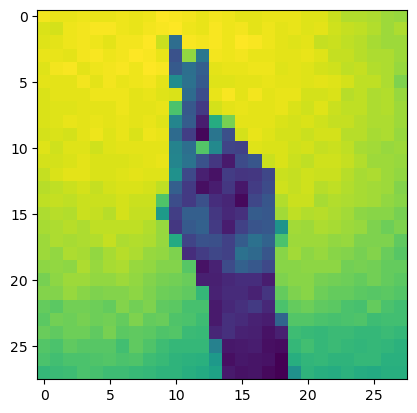

In [13]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)
plt.imshow(train_images[0])
plt.show()

In [14]:
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(train_images)

In [16]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 28 , activation = 'softmax'))

In [18]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(train_images,train_labels, batch_size = 128) ,epochs = 20 , validation_data = (test_images, test_labels))

model.save('smnist.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 50)      

2023-06-17 19:48:48.874736: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1295/1295 [==============================] - 44s 30ms/step - loss: 0.2816 - accuracy: 0.9151 - val_loss: 0.0293 - val_accuracy: 0.9821
Epoch 2/20
1295/1295 [==============================] - 36s 28ms/step - loss: 0.0463 - accuracy: 0.9867 - val_loss: 2.9308 - val_accuracy: 0.6964
Epoch 3/20
1295/1295 [==============================] - 36s 27ms/step - loss: 0.0442 - accuracy: 0.9898 - val_loss: 0.2817 - val_accuracy: 0.9643
Epoch 4/20
1295/1295 [==============================] - 36s 28ms/step - loss: 0.0426 - accuracy: 0.9918 - val_loss: 48.3181 - val_accuracy: 0.2589
Epoch 5/20
1295/1295 [==============================] - 36s 28ms/step - loss: 0.0431 - accuracy: 0.9932 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
1295/1295 [==============================] - 37s 28ms/step - loss: 0.0408 - accuracy: 0.9938 - val_loss: 1.8867e-05 - val_accuracy: 1.0000
Epoch 7/20
1295/1295 [==============================] - 36s 28ms/step - loss: 0.0455 - accuracy: 0.9945 - val_loss: 1.1495e-07